# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [133]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [134]:
# read the data
df = pd.read_csv('datasets//foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

* The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.
* day_of_the_week has two values - Weekend or Weekday
* Some values for the ratings column are 'Not Given'

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [135]:
df.shape

(1898, 9)

#### Observations:
<li> There are 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [136]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* **Categorical Variables:** cusine_type, rating, day_of_the_week 
* **Quantitative Variables:** cost_of_the_order, food_preparation_time, delivery_time
* There are no null values
* **Data Types**
>* Numerical: order_id, customer_id, food_preparation_time, delivery_time
>* String: restuarant_name, cuisine_type, day_of_the_week, rating
>* Float: cost_of_order

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [137]:
# Write your code here
# Function to check for missing values by column name
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

# Another quick way to check for null values
#df.isnull().sum()

,Total,Percent
order_id,0,0.0
customer_id,0,0.0
restaurant_name,0,0.0
cuisine_type,0,0.0
cost_of_the_order,0,0.0
day_of_the_week,0,0.0
rating,0,0.0
food_preparation_time,0,0.0
delivery_time,0,0.0


#### Observations:
<li> There are no missing values
<li> 'ratings' that have 'Not Given' are NOT considered as missing values


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [138]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
* Number of orders is 1898
* Food preparation Time
> * Minimum time is 20 minutes
> * Maximum Time is 35 minutes
> * Average Time is 27.37 minutes
* Std deviation for food preparation and delivery is fairly low. Both values are fairly consistent for each order

### **Question 5:** How many orders are not rated? [1 mark]

In [139]:
# Write code here
df.rating.value_counts().to_frame()

,rating
Not given,736
5,588
4,386
3,188


#### Observations:
There 736 orders that are not rated. 
For the rest of the order ratings are 3,4 or 5

In [140]:
df.cuisine_type.value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

#### Observations
* There are 584 orders for American and 7 orders for Vietnamese

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

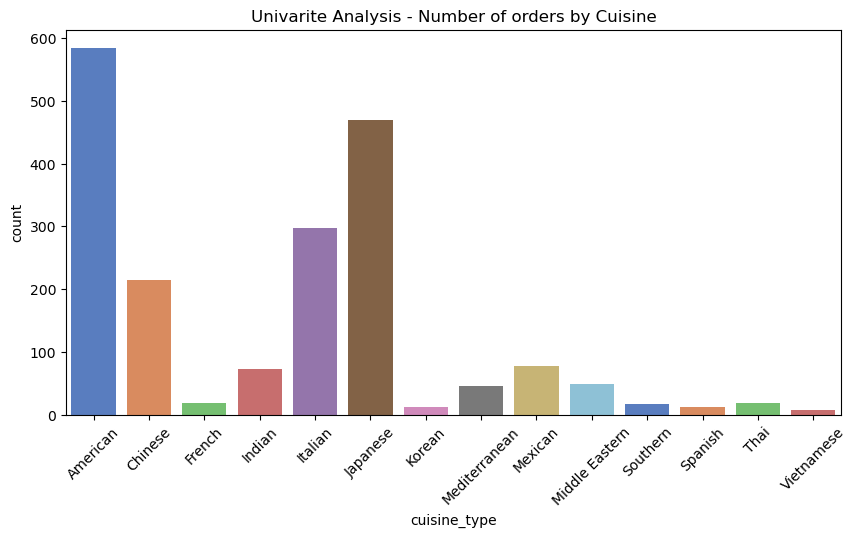

In [141]:
plt.figure(figsize=(10,5))  # setting the figure size

ax = sns.countplot(x='cuisine_type', data=df.sort_values('cuisine_type'), palette='muted') # Sorting by cuisine label

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Univarite Analysis - Number of orders by Cuisine")
plt.show()

#### Observations
* American is the most popular cuisine. Followed by Japanese and Italian as the most popular 

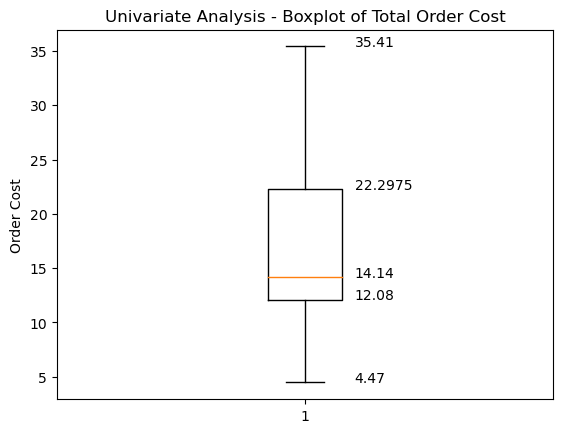

In [142]:
# plot a distribution of total bill
plt.boxplot(df['cost_of_the_order'])

orderCostMin = df['cost_of_the_order'].min()
orderCostQ1 = df.cost_of_the_order.quantile(0.25)
orderCostMedian = df['cost_of_the_order'].median()
orderCostQ3 = df.cost_of_the_order.quantile(0.75)
orderCostMax = df['cost_of_the_order'].max()

# add labels for five number summary
plt.text(x = 1.1, y = orderCostMin, s = orderCostMin)
plt.text(x = 1.1, y = orderCostQ1, s = orderCostQ1)
plt.text(x = 1.1, y = orderCostMedian, s = orderCostMedian)
plt.text(x = 1.1, y = orderCostQ3, s = orderCostQ3)
plt.text(x = 1.1, y = orderCostMax, s = orderCostMax)


# add the graph title and axes labels
plt.title('Univariate Analysis - Boxplot of Total Order Cost')
plt.ylabel('Order Cost')

# display the plot
plt.show()

### Observations
* Minimum Order cost is 4.57, Maximum order cost 35.41 and median is 14.14
* There are no outliers in the dataset



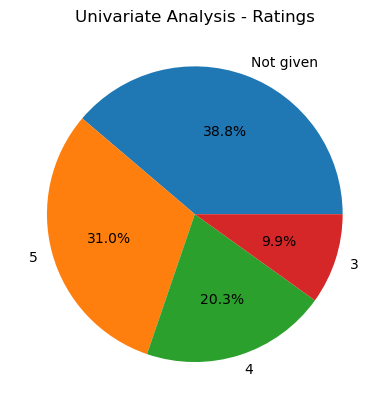

In [143]:
plt.pie(df.rating.value_counts(), autopct = '%.1f%%', radius = 1, labels = ['Not given', '5','4','3'])

plt.title("Univariate Analysis - Ratings")

# display the plot
plt.show()


#### Observations:
* Ratings are not provided for 40% of the orders
* Encouraging customers to provide ratings will improve accuracy of statistical analysis

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [144]:
# Write the code here
df.groupby('restaurant_name')['restaurant_name'].agg(Count='count').sort_values(by='Count', ascending=False).head()

,Count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
* Top 5 restaurants in terms of the number of orders
* Shake Shack is the most popular restaurant for Food delivery service


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [145]:
# Write the code here
df.query("day_of_the_week == 'Weekend'").groupby('cuisine_type')['cuisine_type']\
    .agg(Count='count').sort_values(by='Count', ascending=False).head()


,Count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations:
* American is most popular on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [146]:
# Write the code here

df.query("cost_of_the_order > 20").count()['order_id']/df.shape[0] * 100


29.24130663856691

#### Observations:
* Percentage of orders cost more than $20 is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [147]:
# Write the code here
round(df.delivery_time.mean(),0)

24.0

#### Observations:
* Mean order delivery time is 24 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [148]:
# Write the code here
df.groupby('customer_id')['customer_id'].agg(Count='count').sort_values(by='Count', ascending=False).head()

,Count
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7


#### Observations:
The top three customer ids are
1. 52832
2. 47440
3. 83287


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


# Write the code here
1. Histogram - No of restuarants by Cuisine Tyep
1. Cuisine type with no ratings - Total orders
1.1 Cuisine type and ratings and total orders
2. food preparation time cuisine type
3. rating vs preparation time, delivery time, total time

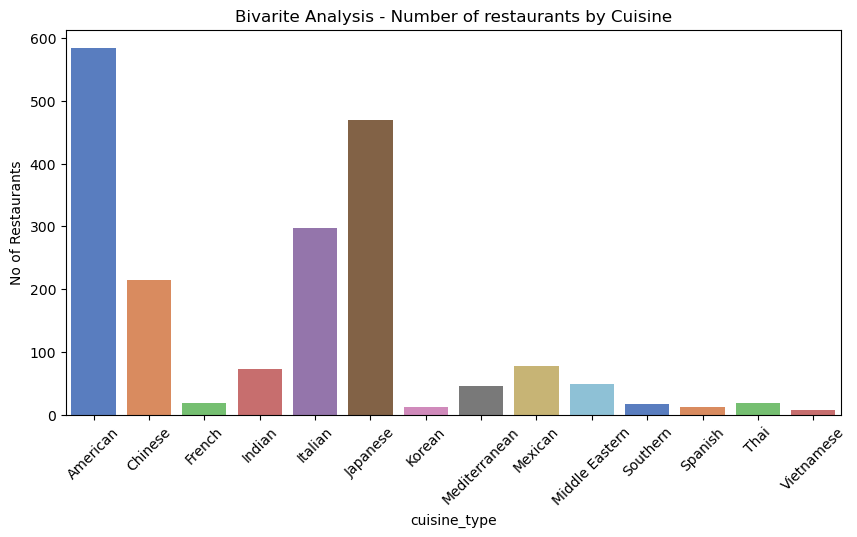

In [149]:
df2 = df.groupby(['cuisine_type']).agg('count').reset_index()

plt.figure(figsize=(10,5))  # setting the figure size

ax = sns.barplot(x='cuisine_type', y='order_id', data=df2, palette='muted') 

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('No of Restaurants')
plt.title("Bivarite Analysis - Number of restaurants by Cuisine")
plt.show()

#### Observations
* Korean, Thai, Middle Eastern, French, Spanish and Mexican cusines have very low number of resturants as part of the service.
* A focus on adding restaurants in this category may bring in new incremental revenue

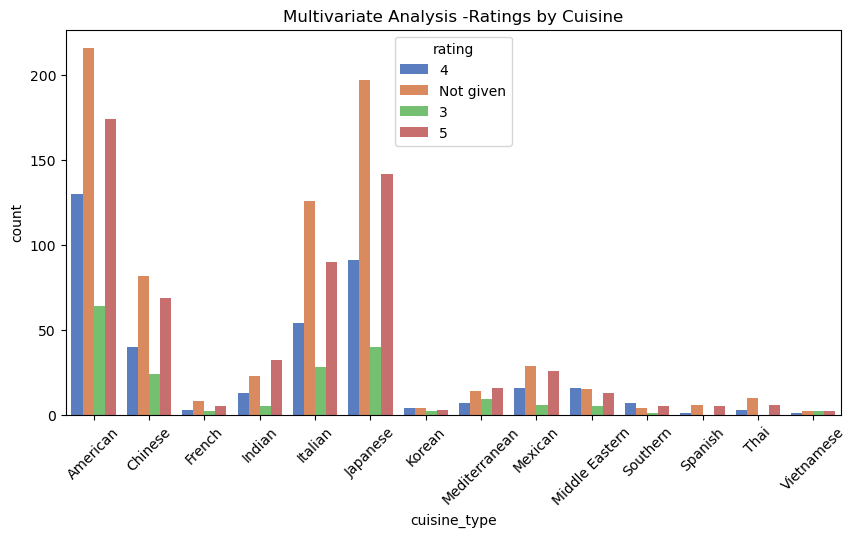

In [150]:
plt.figure(figsize=(10,5))  # setting the figure size

ax = sns.countplot(x='cuisine_type', data=df.sort_values('cuisine_type'), hue='rating', palette='muted') # Sorting by cuisine label

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Multivariate Analysis -Ratings by Cuisine")
plt.show()


#### Observations
* American, Japanese, Italian are top ratings receivers. If the number of ratings for other cuisine types go higher, then might do good business. 
* The chart is not ordered by ratings within cuisine type. I need find a way to order them

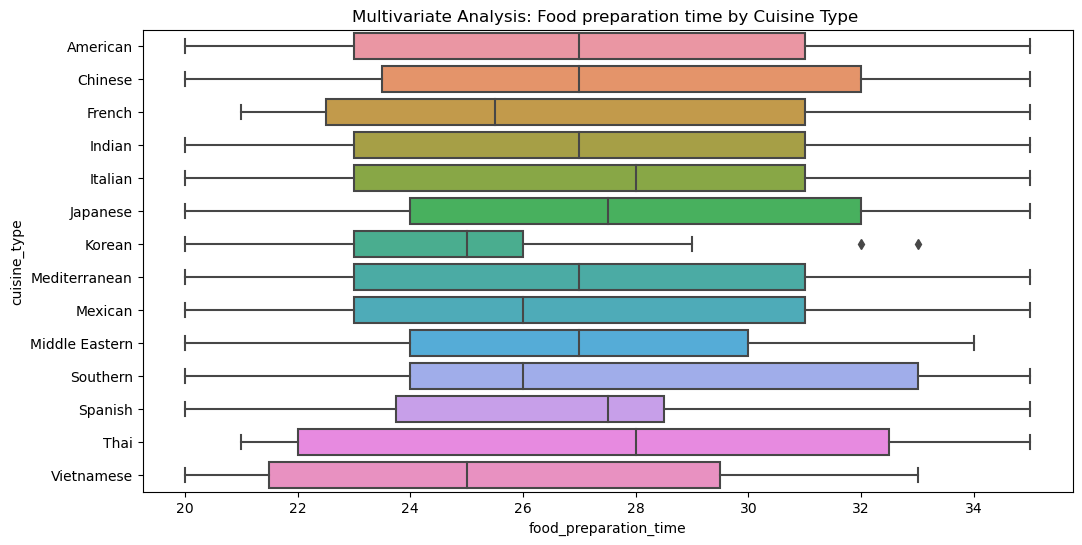

In [151]:
plt.figure(figsize = (12,6))
sns.boxplot(y="cuisine_type", x="food_preparation_time", data=df.sort_values('cuisine_type'))
plt.title("Multivariate Analysis: Food preparation time by Cuisine Type ")

plt.show()

#### Observations
* There are no significant outliers for all cuisine types. Korean has two outlier, but within the range of other cuisine types
* American, Indian, Mediterranean have identical boxplots. Italian and Mexican also have the same size, but median values are different. Needs futher investigation of the data.

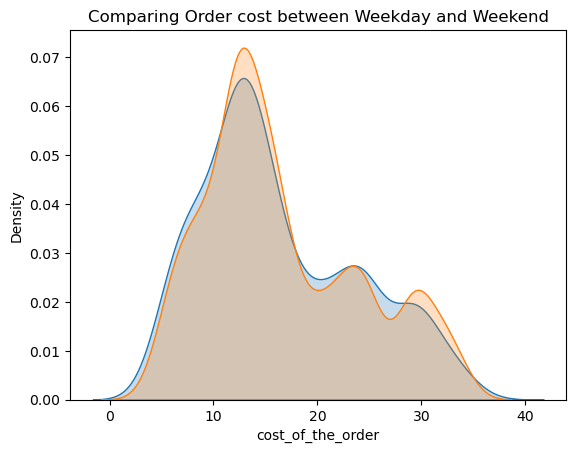

In [152]:


# list of time
time = ['Weekday', 'Weekend']

# # iterate through time
for i in time:
    subset = df[df['day_of_the_week'] == i]
    
# # Draw the density plot`
# # 'hist = False' will not plot a histogram
# # 'kde = True' plots density curve
    sns.distplot(subset['cost_of_the_order'], hist = False, kde = True,
                  kde_kws = {'shade':True},
                  label = i)

plt.title("Comparing Order cost between Weekday and Weekend")
plt.show()

#### Observation
* Order cost on weekdays or weekends is almost the same


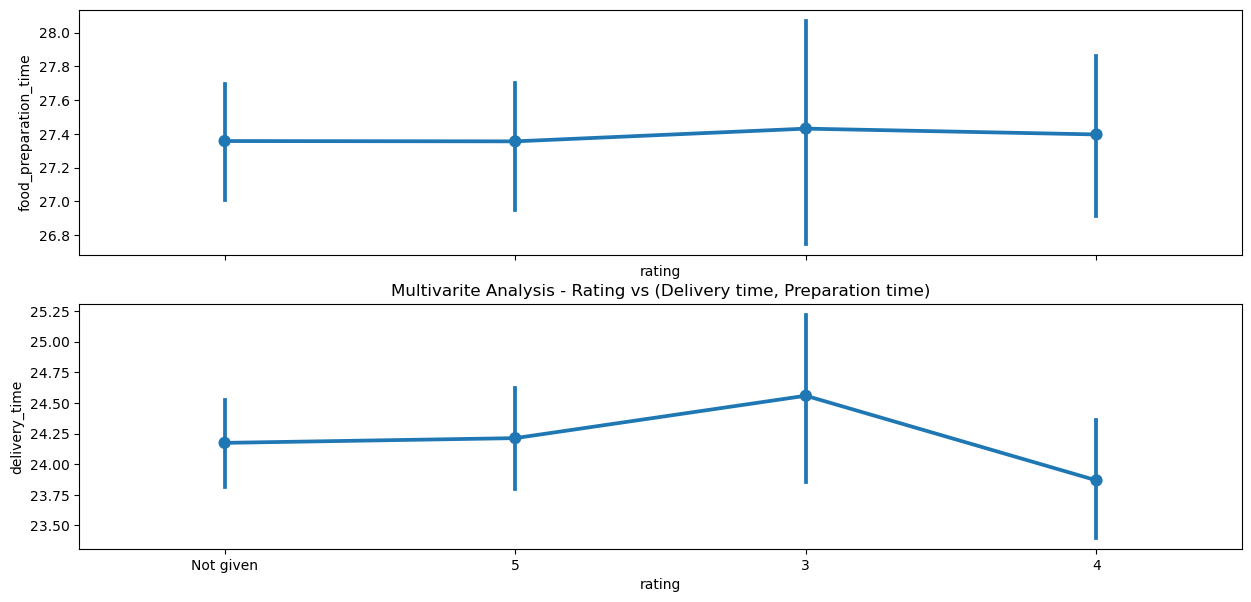

In [153]:
# Rating and delivery time

f2, (ax1, ax2) = plt.subplots(nrows = 2,     # Number of rows of the subplot grid
                                           sharex = True, # The X-axis will be shared among all the subplots
                                           gridspec_kw = {"height_ratios": (.75, .75)}, 
                                           figsize = (15, 7) 
                                           ) 

plt.title('Multivarite Analysis - Rating vs (Delivery time, Preparation time)')


sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df, ax = ax1)
sns.pointplot(x = 'rating', y = 'delivery_time', data = df, ax = ax2)

plt.show()

#### Observations
* It seems like Ratings has no-effect on food preparation or delivery time
* Need further investigation on how to motivate customers to give ratings for an order

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [154]:
# A dataframe that has restuarants with the following columns
    ##  ratingsMean - Average rating across all orders
    ##  ratingsCount - Total number of ratings across all orders
    
## Add a new column for rating as 'Int32'. If the current value is 'Not given', then change it to 0
df['ratingInt'] = df.rating.str.replace('Not given', '0').astype(int)

agg_func_math = {
    'ratingInt': [ 'mean', 'count'] 
}
df2 = df.query("(rating in ['3', '4', '5'])").groupby(['restaurant_name']).agg(agg_func_math)
df2.columns=['ratingsMean', 'ratingsCount'] # Rename the columns

# get restaurants that received more 50 ratings and mean rating greater than 4
df2.query('(ratingsCount > 50) and (ratingsMean > 4.0)')



,ratingsMean,ratingsCount
restaurant_name,,
Blue Ribbon Fried Chicken,4.328125,64
Blue Ribbon Sushi,4.219178,73
Shake Shack,4.278195,133
The Meatball Shop,4.511905,84


#### Observation
* There are four restaurants that have more than 50 ratings and received average rating of 4




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [155]:
# Write the code here
## Totals for order cost above or equal to $20
totalOrderCostAbove20 = df.query('cost_of_the_order >= 20')['cost_of_the_order'].sum()

## Totals for order cost above $5 and less than $20
totalOrderCostAbove5 = df.query('cost_of_the_order >= 5' and 'cost_of_the_order < 20')['cost_of_the_order'].sum()

netRevenue = totalOrderCostAbove20 * .25 + totalOrderCostAbove5 * .15
print("Net revenue earned: {:.2f}".format(netRevenue))


Net revenue earned: 6172.71


#### Observations:

* Company will earn revenue of $6,172.71

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [156]:
# Write the code here
df.query('food_preparation_time + delivery_time > 60')['order_id'].count()/df.shape[0] * 100

10.537407797681771

#### Observations:
* Percentage of orders that take more than 60 minutes (preparation + delivery) is 10.5%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [157]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,ratingInt
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,0
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,0
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4


In [158]:
# Write the code here
avgDelTimeWeekday = df.query('day_of_the_week == "Weekday"')['delivery_time'].mean()
avgDelTimeWeekend = df.query('day_of_the_week == "Weekend"')['delivery_time'].mean()

print("Average delivery Time - Weekday: ", round(avgDelTimeWeekday, 2))
print("Average delivery Time - Weekend: ", round(avgDelTimeWeekend, 2))

Average delivery Time - Weekday:  28.34
Average delivery Time - Weekend:  22.47


#### Observations:
* Average delivery time is shorter during weekdays.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Close 40% of the orders do not receive ratings. Increasing ratings for a given order will improve statiscal analysis to drive better decisions in the future
* American, Italian, Japanese cuisines are very popular. The number of the restaurants in this category is also high.

### Recommendations:

* Why do customer do not give ratings for the order? What motivates them to give ratings? Investigate
* Focus on adding more restaurants. For example: Chinese, Mexican, Thai and Indian 

---